In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (30, 50)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import json

In [4]:
countries={'CA':'Canadá','DE':'Alemania','FR':'Francia',
           'GB':'Reino Unido','IN':'India','JP':'Japón',
           'KR':'Korea','MX':'Mexico','RU':'Rusia',
           'US':'Estados Unidos'}
dataframes = dict()
prefijos = countries.keys()
for countrie in prefijos:
    dataframes[countrie]=pd.read_csv(f'..\\data\\{countrie}videos.csv',sep=',',encoding="ISO-8859-1")
    print(f'data\\{countrie}videos.csv')

data\CAvideos.csv
data\DEvideos.csv
data\FRvideos.csv
data\GBvideos.csv
data\INvideos.csv
data\JPvideos.csv
data\KRvideos.csv
data\MXvideos.csv
data\RUvideos.csv
data\USvideos.csv


In [3]:
"""dataframes['CA']['publish_time'] = dataframes['CA']['publish_time'].apply(lambda x: str(x)[5:7])
dataframes['CA'].head()
dataframes['CA'].groupby('publish_time').agg(
    numero_de_videos= ('views', "count"),
    media= ('views', "mean"),
    suma_de_visitas=('views', sum),
    numero_likes=('likes', sum), 
)"""
dataframes['CA'].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [5]:
with open(r'..\data\CA_category_id.json') as json_file:
    data = json.load(json_file)
    store_list = dict()
    for item in data['items']:
        store_list[int(item['id'])] = item['snippet']['title']
    print (store_list.values())
    
for dataframe in dataframes.keys():
    dataframes[dataframe] = dataframes[dataframe].replace({"category_id": store_list})
    #dataframes[dataframe]["category_id"] = str(dataframes[dataframe]["category_id"])
    #dataframes[dataframe] = dataframes[dataframe].sort_values(by='category_id')

dict_values(['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Travel & Events', 'Gaming', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology', 'Comedy', 'Shows'])


C:\Users\guill\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


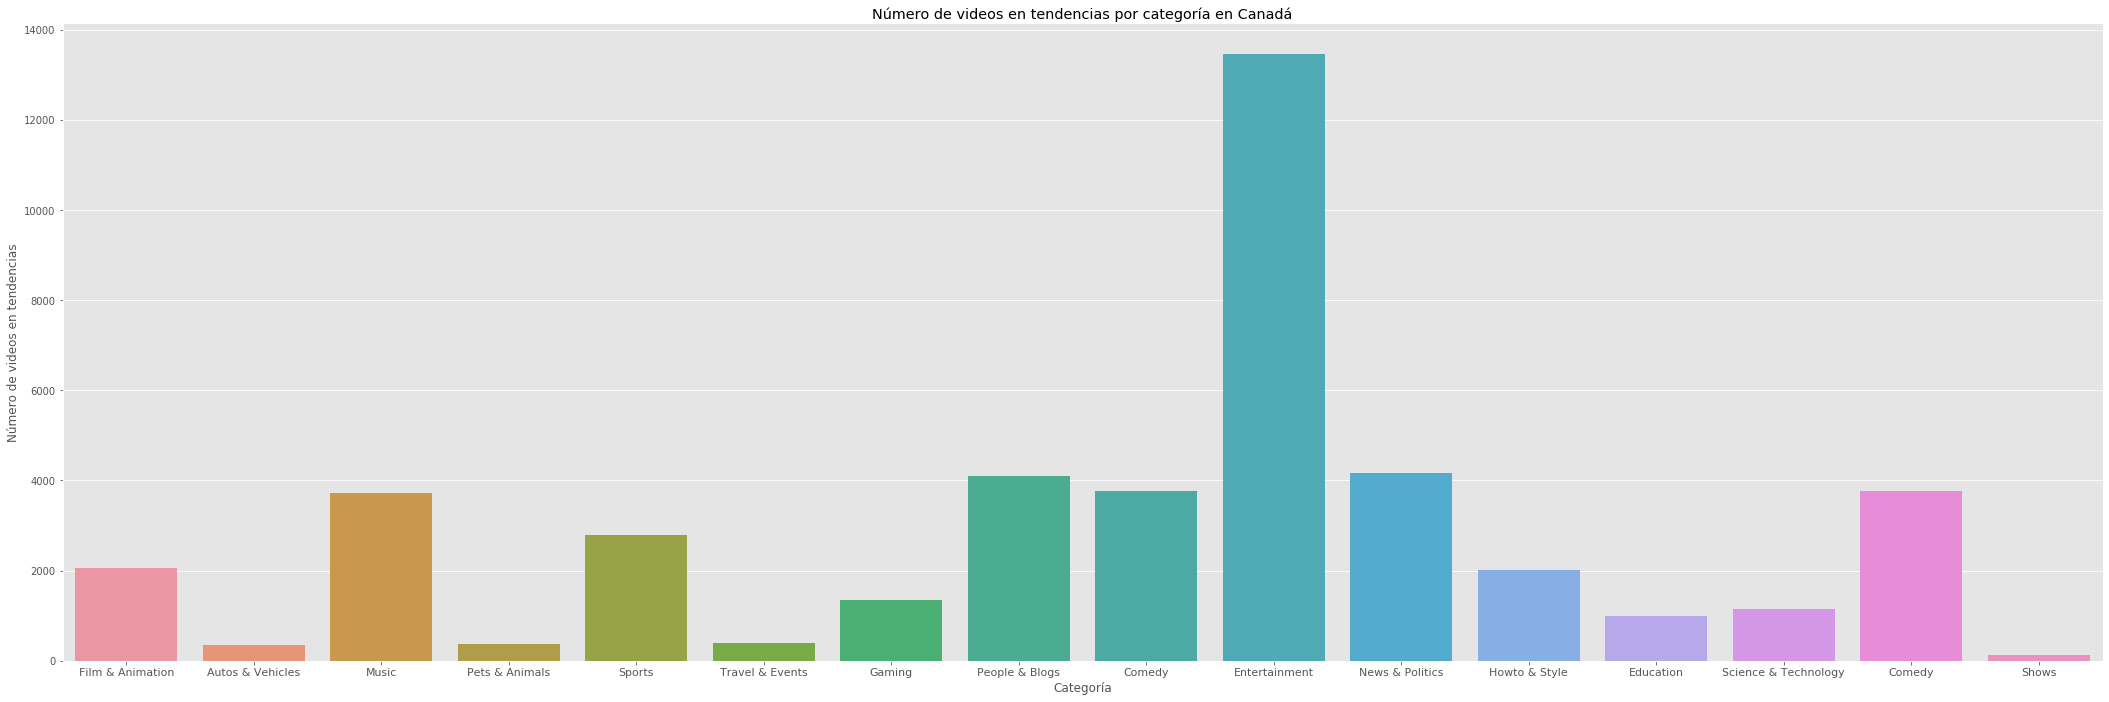

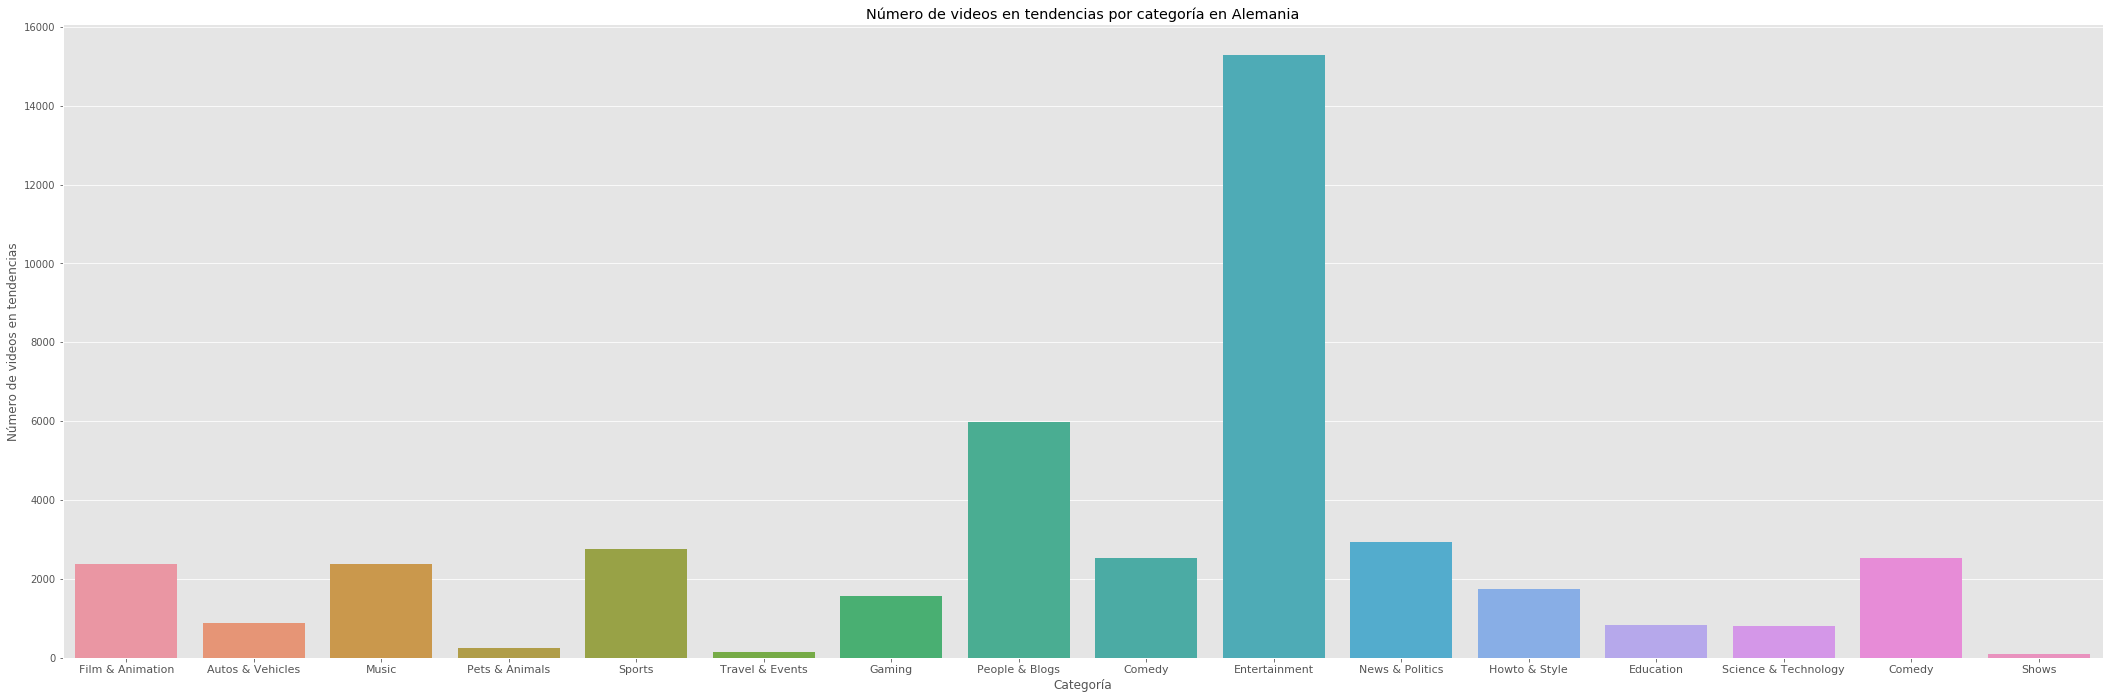

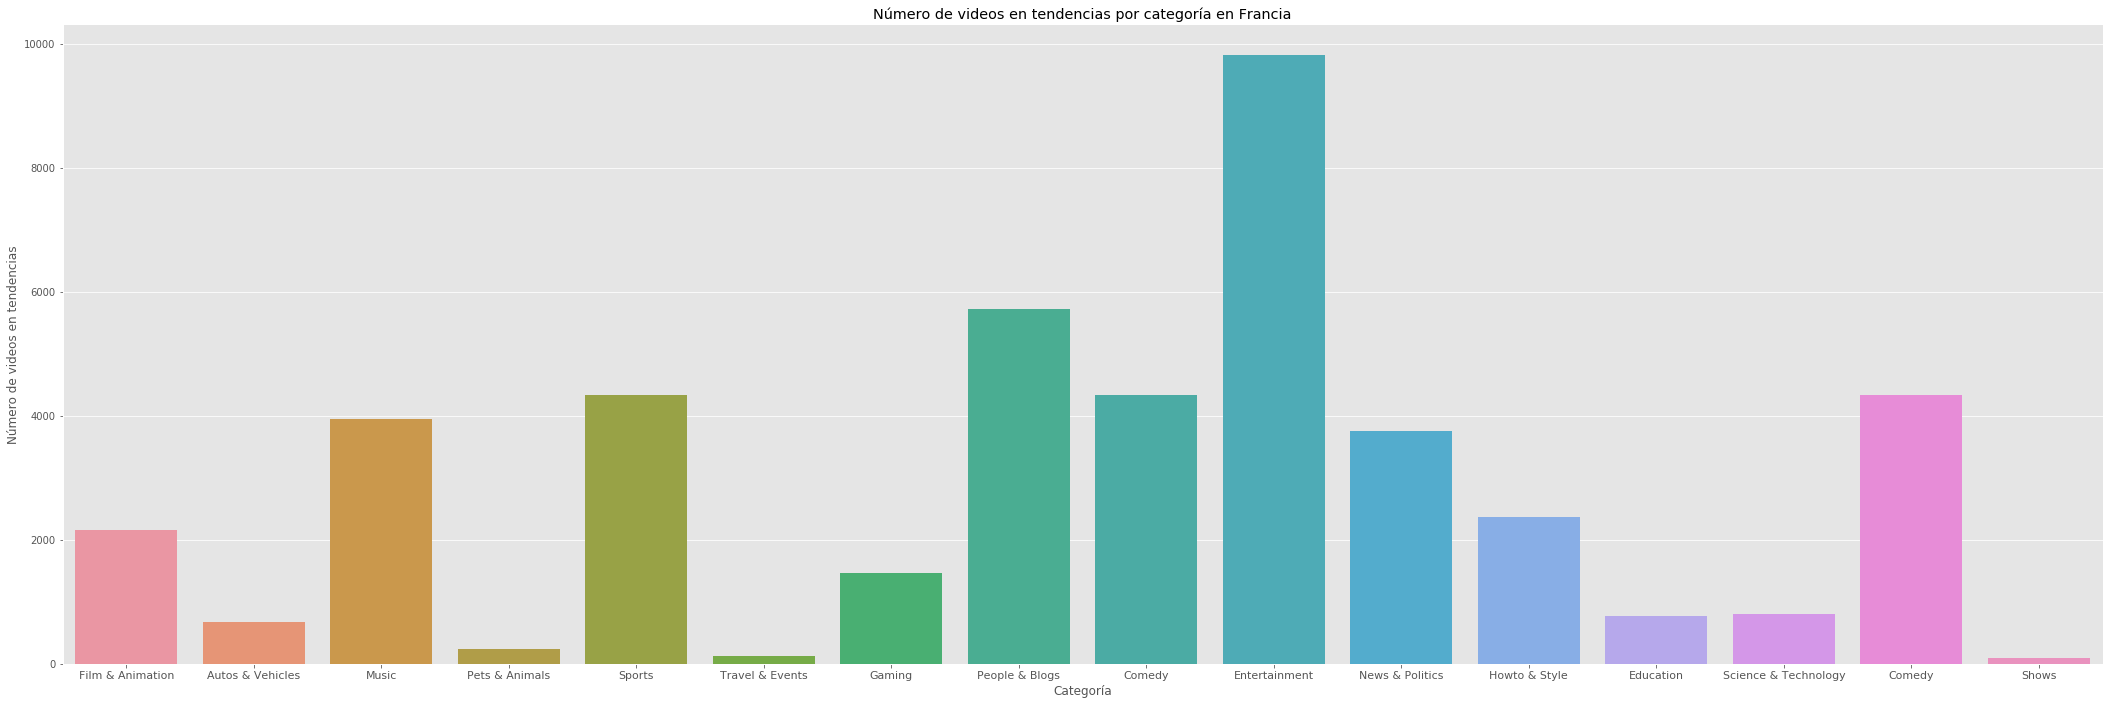

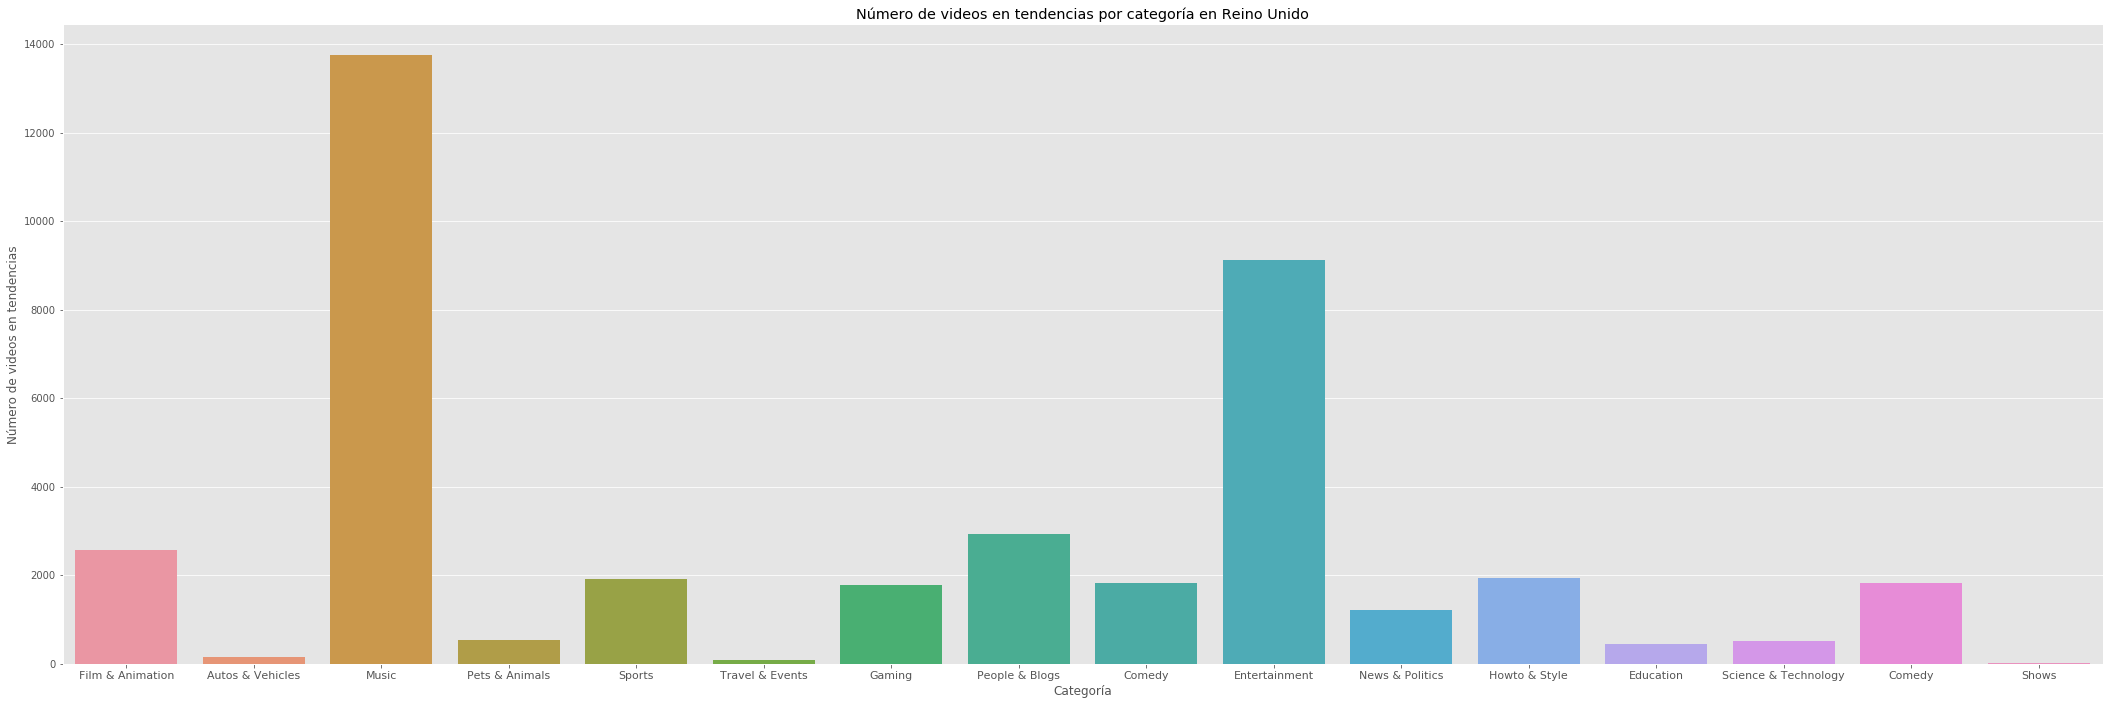

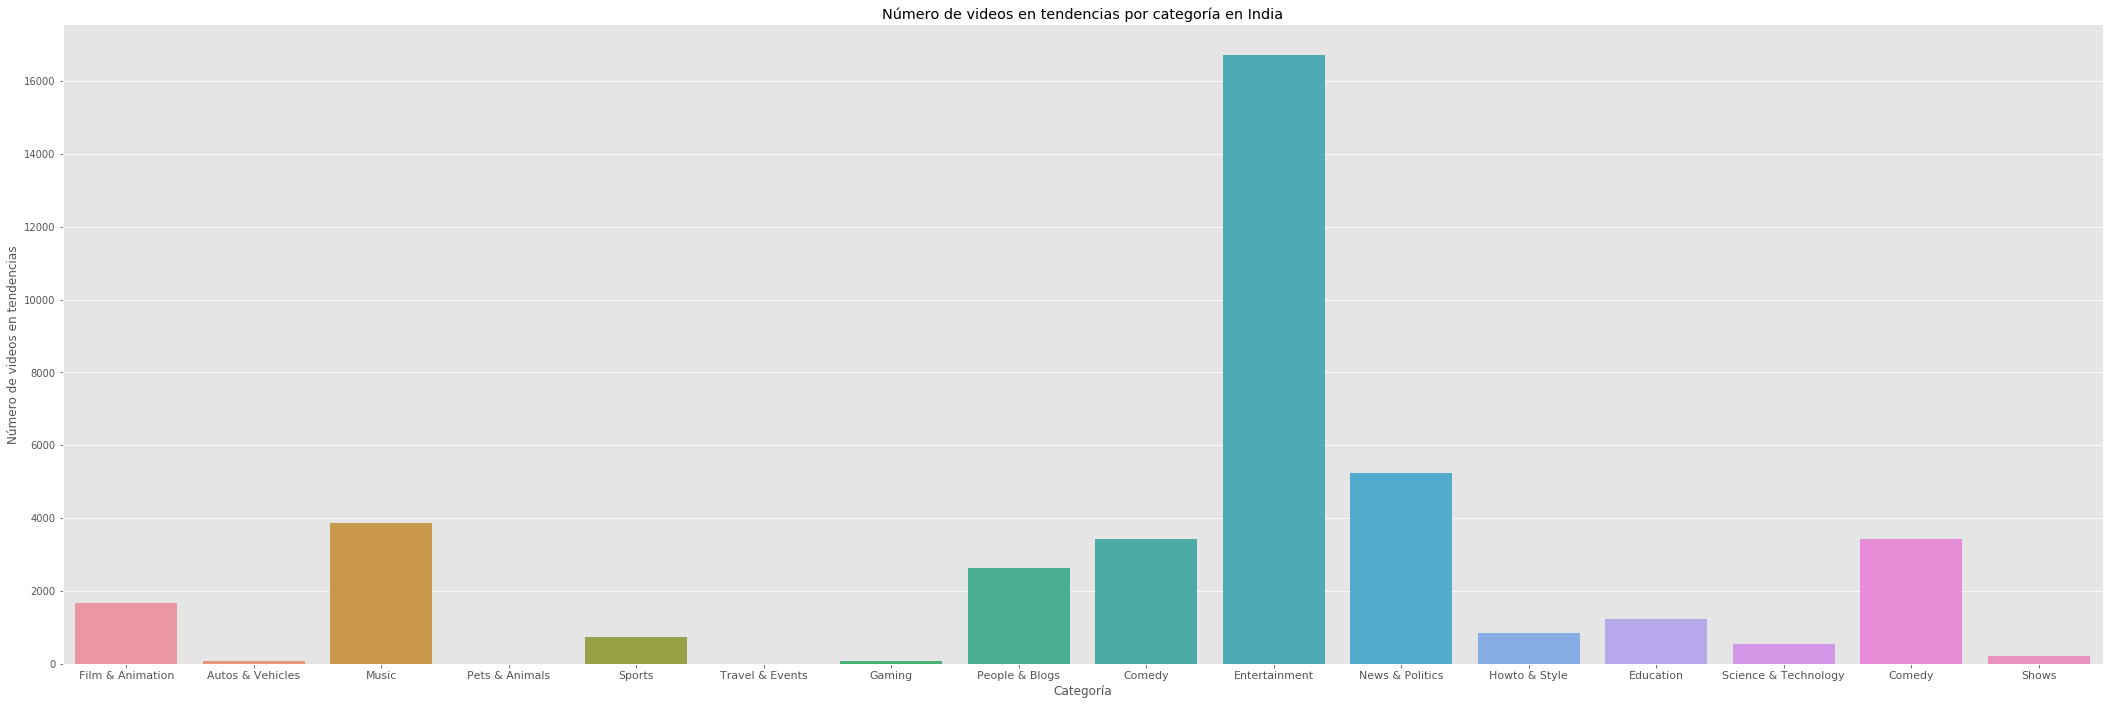

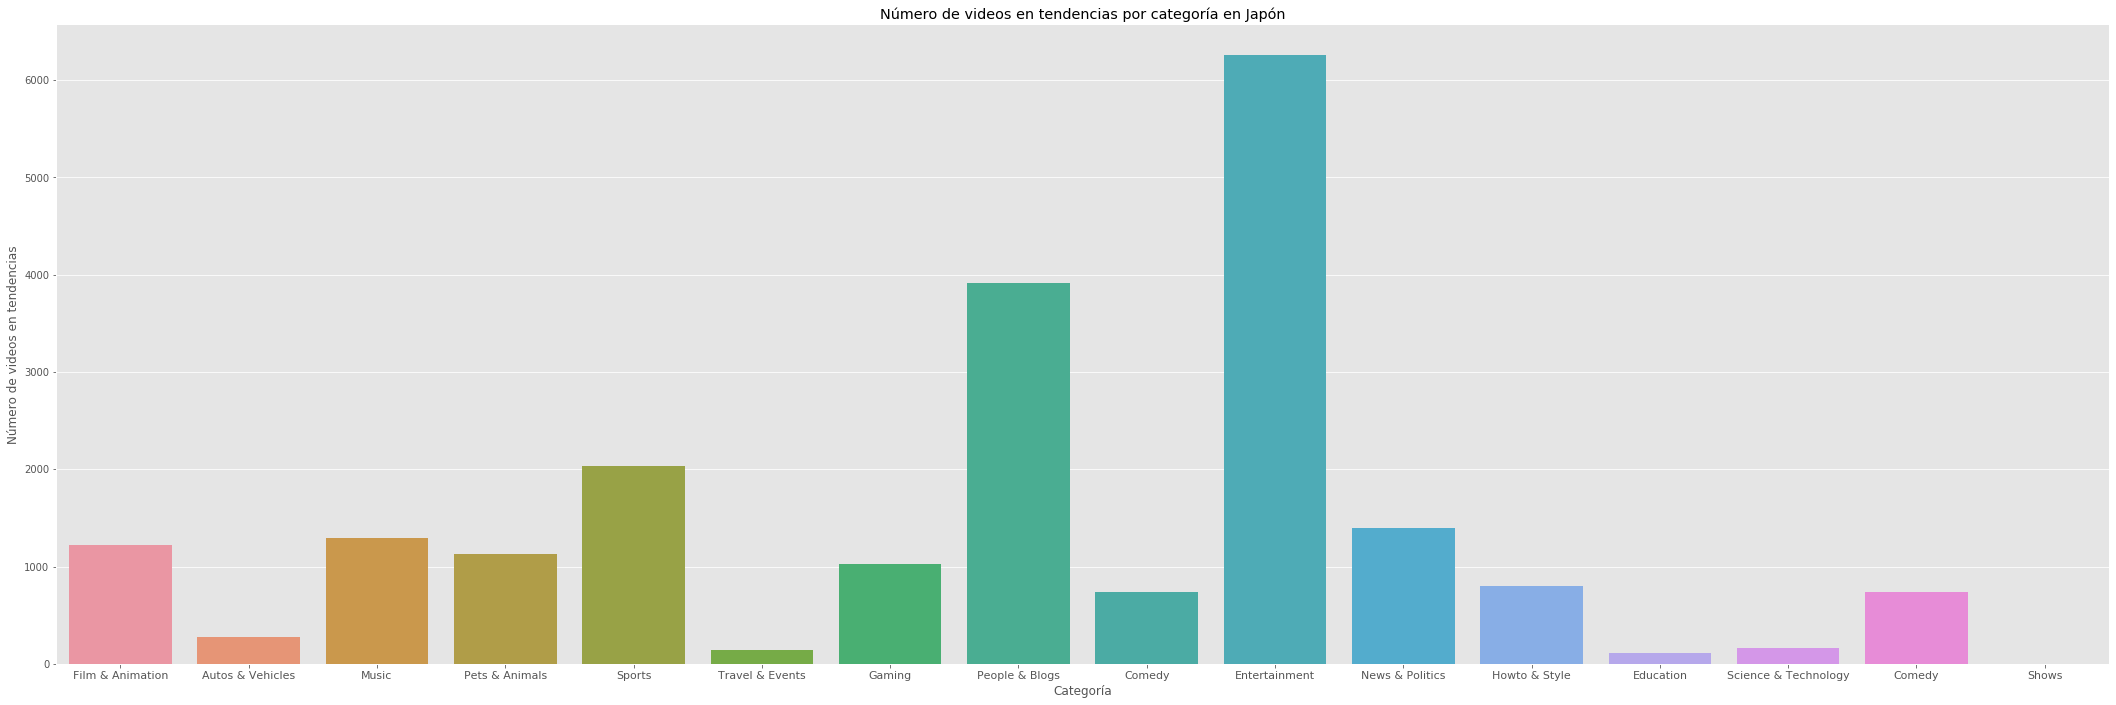

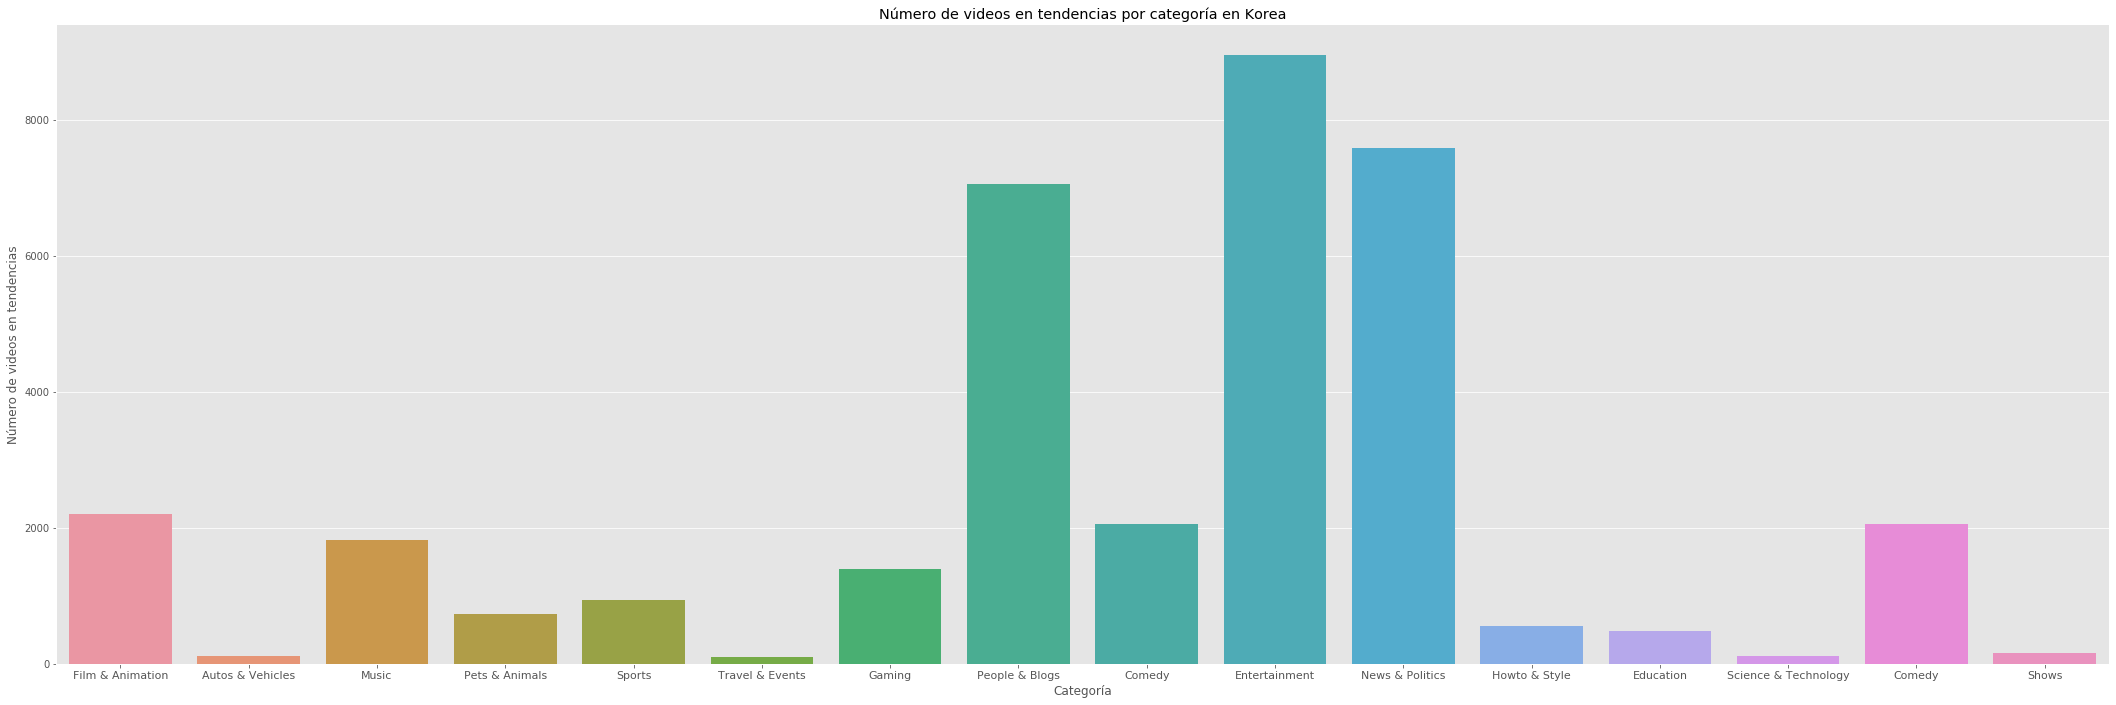

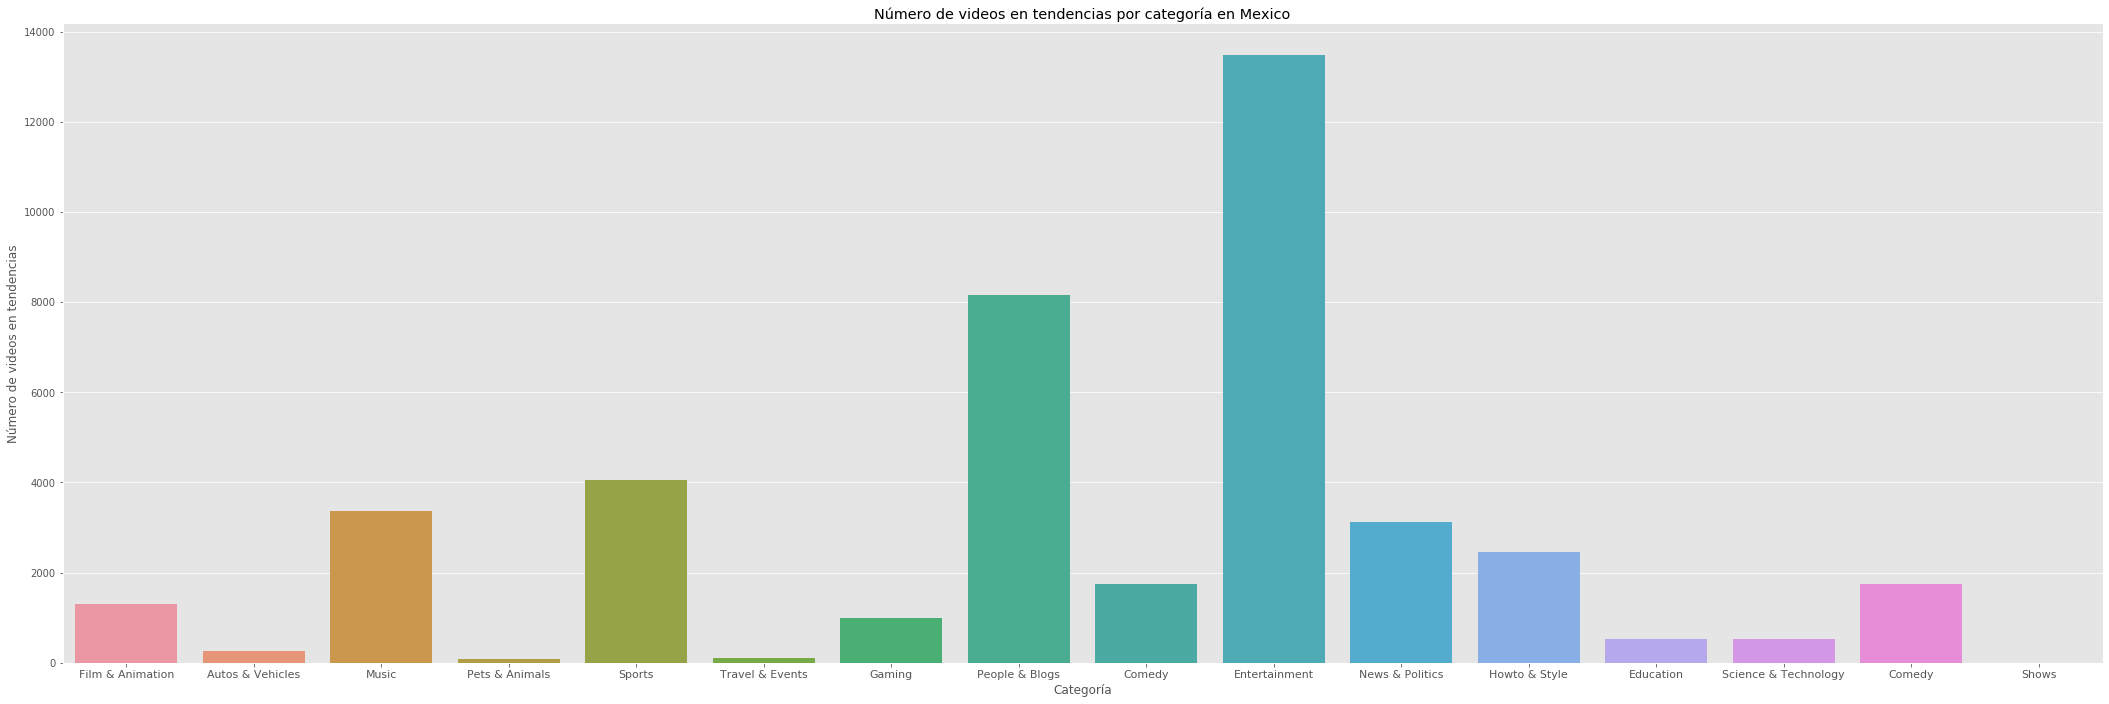

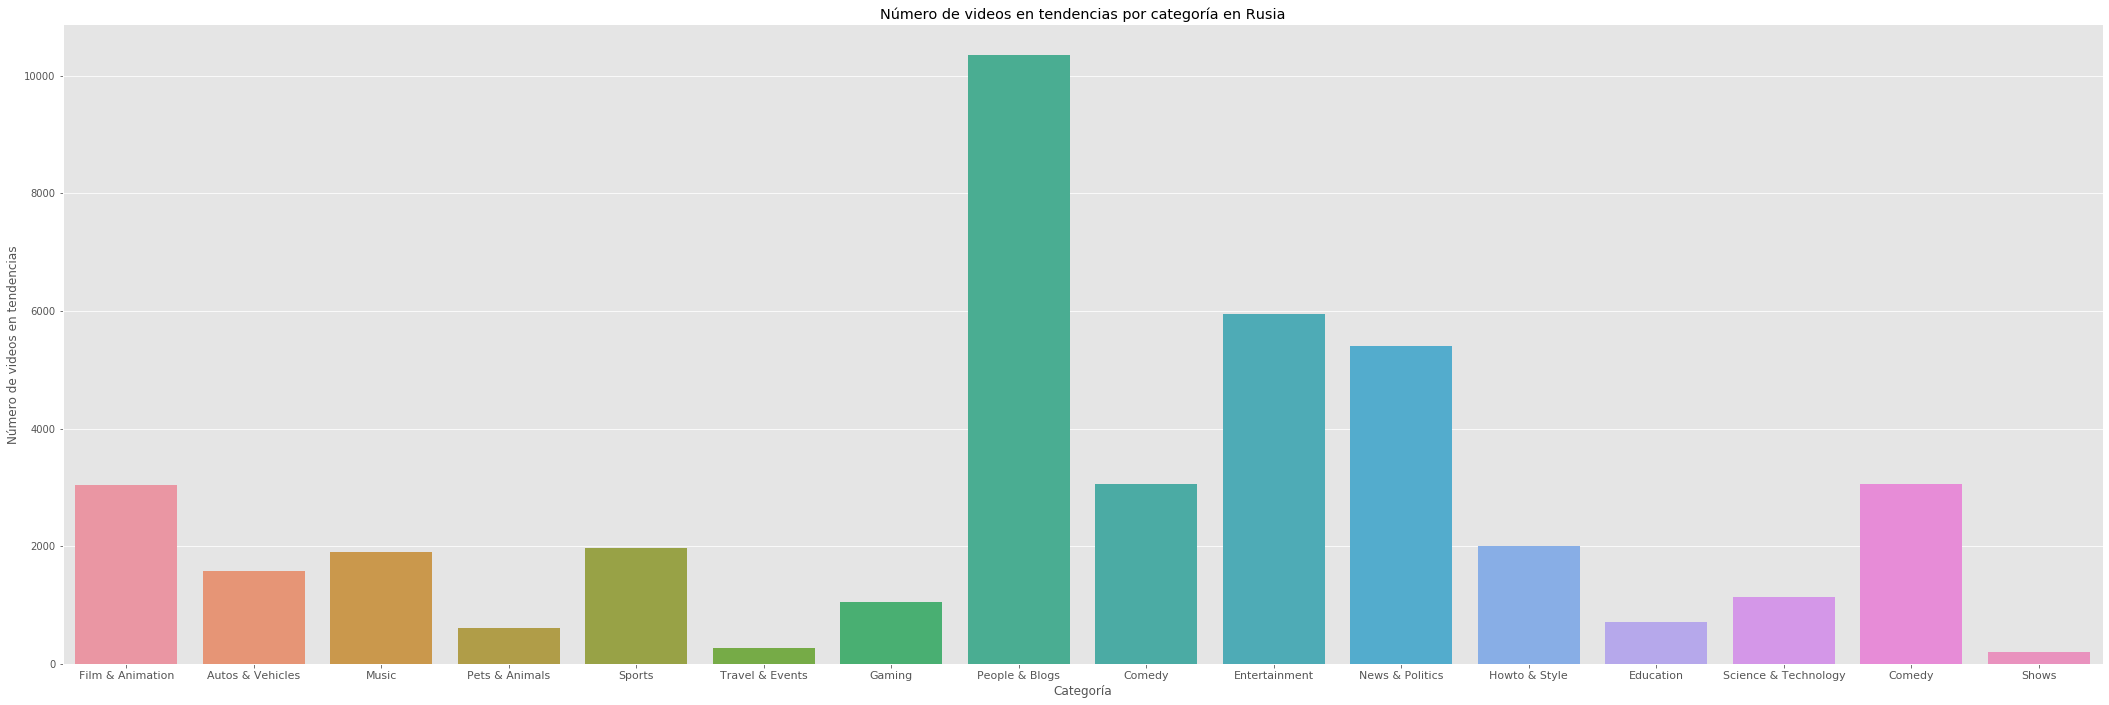

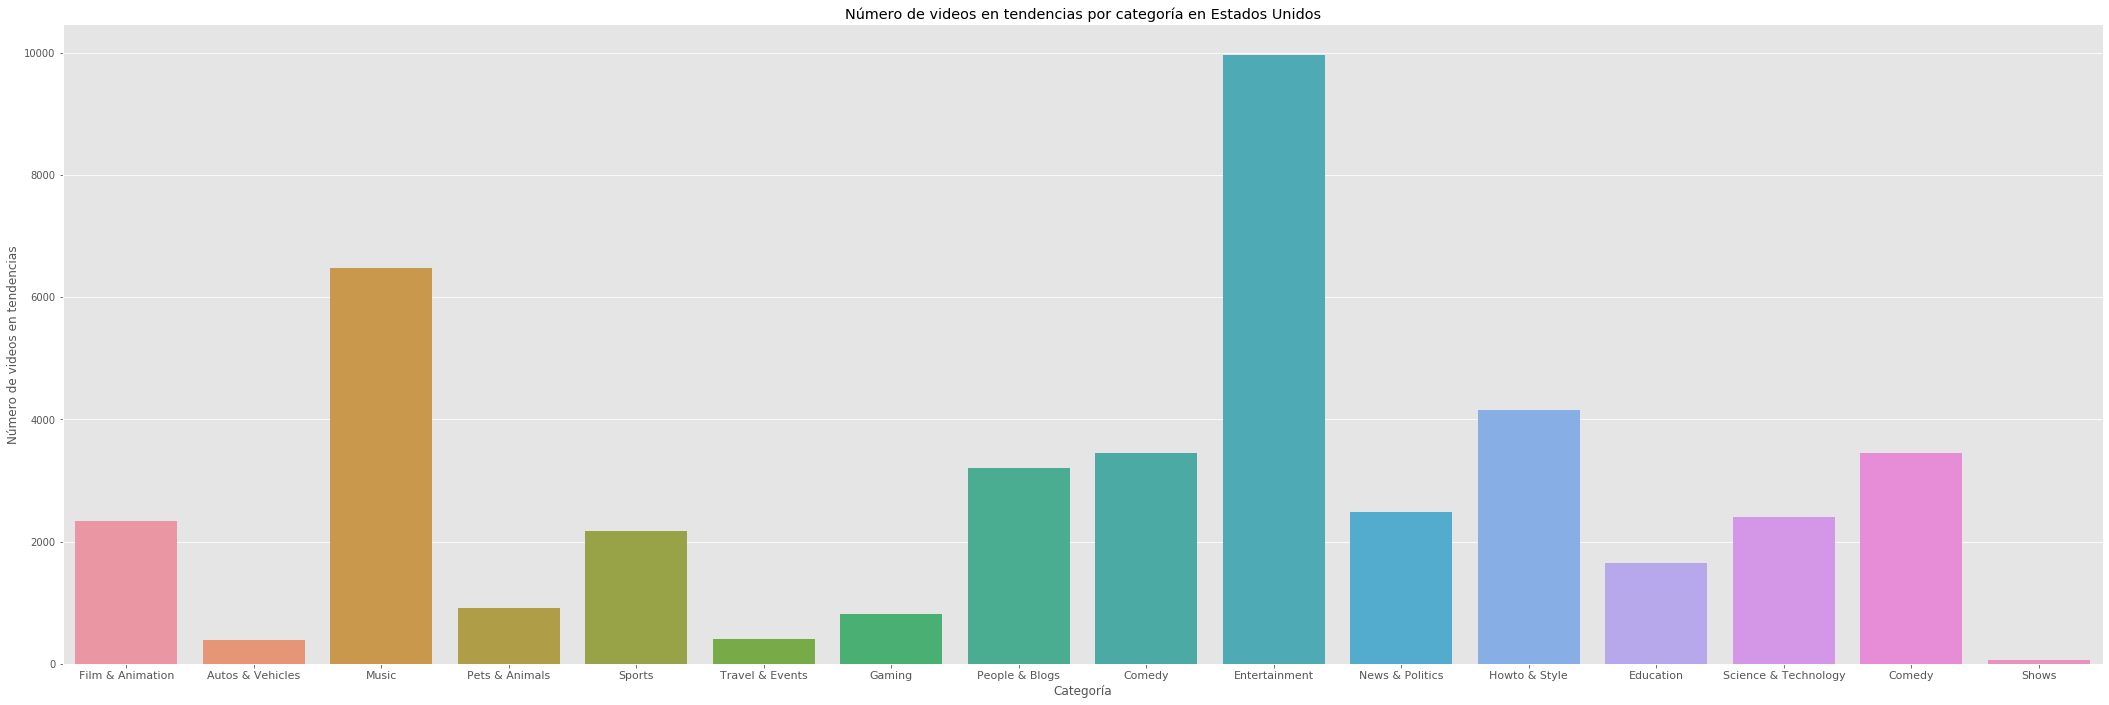

In [6]:
for dataframe in dataframes.keys():
    f=sb.factorplot('category_id',data=dataframes[dataframe],kind="count", aspect=3,hue_order =store_list.values(),order=store_list.values())
    f.set_xticklabels(fontsize= 11)
    plt.xlabel("Categoría")
    plt.ylabel("Número de videos en tendencias")
    plt.title(f"Número de videos en tendencias por categoría en {countries[dataframe]}") # You can comment this line out if you don't need title
    fig = plt.gcf()
    fig.set_size_inches(30, 10.5)
    fig.savefig(f'categoriaTop{dataframe}.png', dpi=100)

In [7]:
total_dataframe = pd.DataFrame()
for prefix in dataframes.keys():
    total_dataframe = pd.concat([total_dataframe, dataframes[prefix]])
total_dataframe['publish_time'] = total_dataframe['publish_time'].apply(lambda x: str(x)[5:7])
#total_dataframe.head()
#otal_dataframe.groupby('publish_time', as_index=False).agg({"views": "mean"})
resultados=total_dataframe.groupby('publish_time').agg(
    numero_de_videos= ('views', "count"),
    media= ('views', "mean"),
    suma_de_visitas=('views', sum),
    numero_likes=('likes', sum), 
)

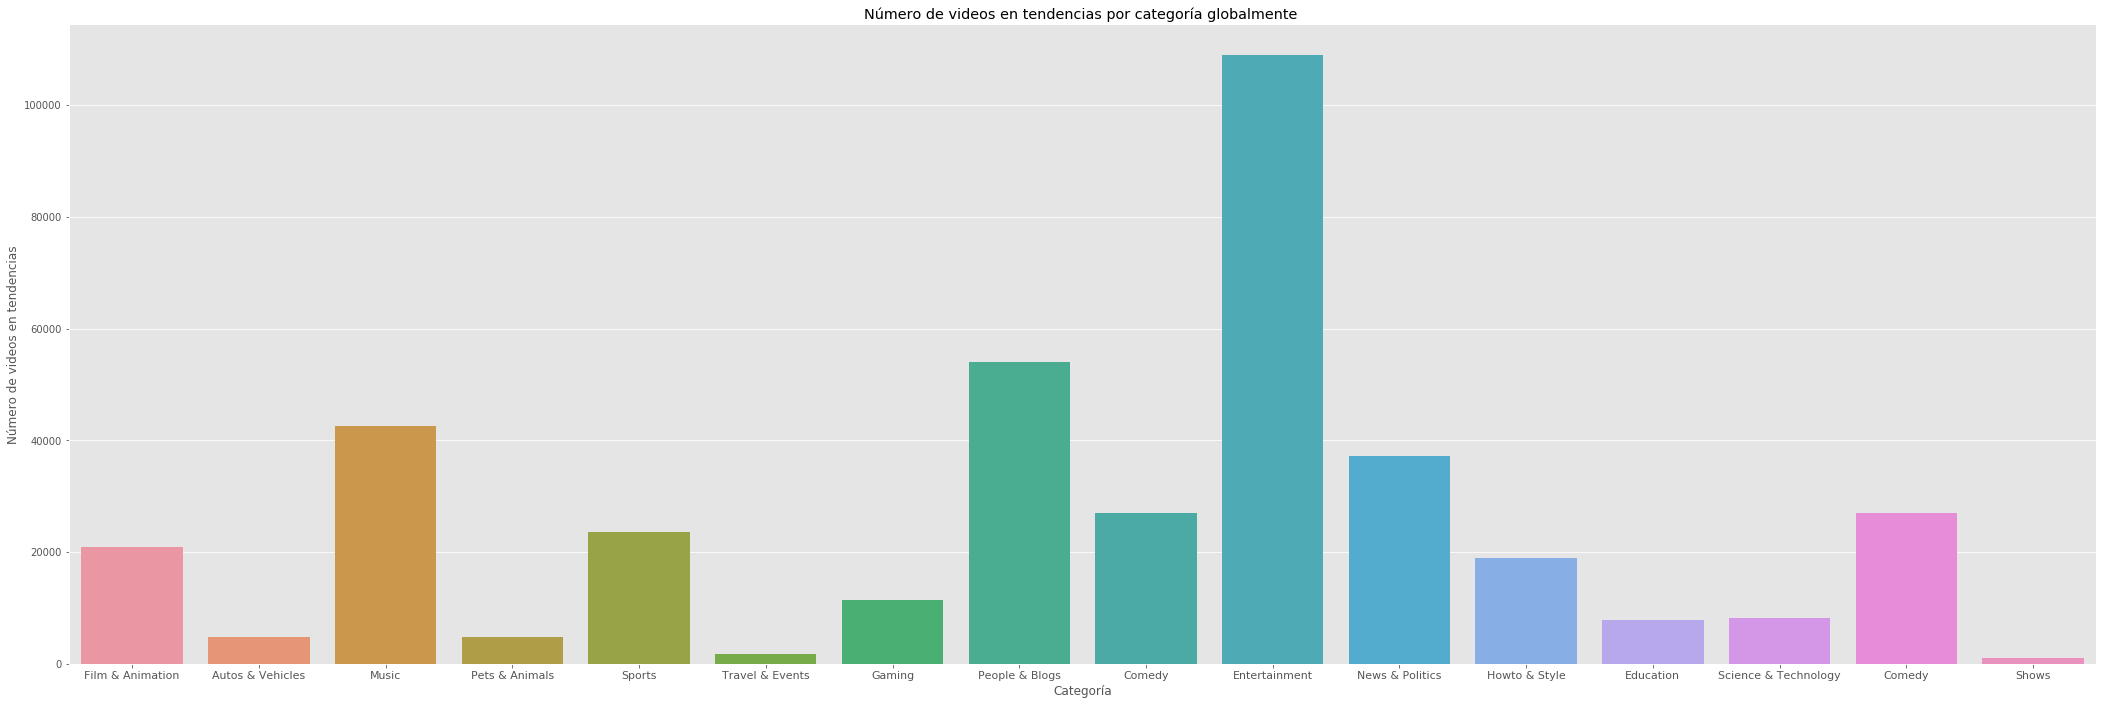

In [8]:
f=sb.factorplot('category_id',data=total_dataframe,kind="count", aspect=3,hue_order =store_list.values(),order=store_list.values())
f.set_xticklabels(fontsize= 11)
plt.xlabel("Categoría")
plt.ylabel("Número de videos en tendencias")
plt.title(f"Número de videos en tendencias por categoría globalmente ") # You can comment this line out if you don't need title
fig = plt.gcf()
fig.set_size_inches(30, 10.5)
fig.savefig(f'categoriaTopGlobal.png', dpi=100)

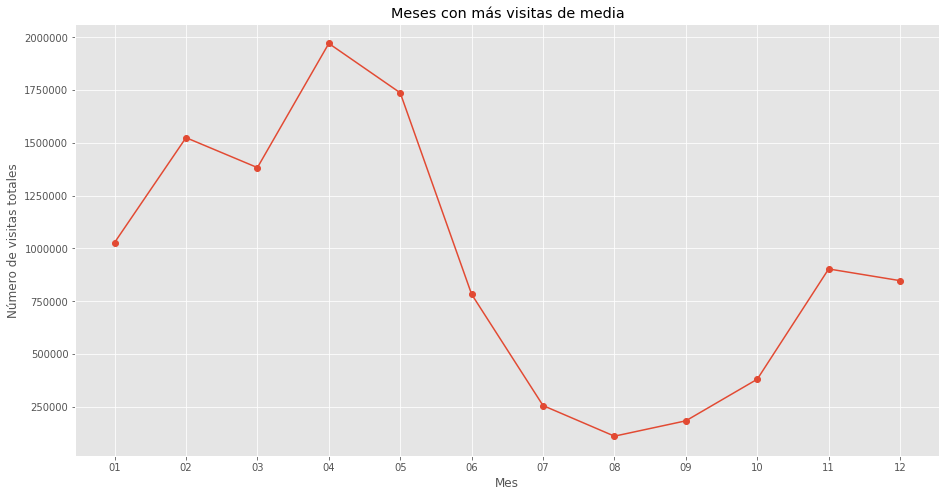

In [9]:
fig= plt.figure(figsize=(12,6))

axes= fig.add_axes([0,0,1,1])

axes.plot(resultados.media,marker='o')
axes.set(ylabel='Número de visitas totales', xlabel='Mes',
       title='Meses con más visitas de media')

plt.show()


In [10]:
total_dataframe = pd.DataFrame()
for prefix in dataframes.keys():
    total_dataframe = pd.concat([total_dataframe, dataframes[prefix]])
total_dataframe['publish_time'] = total_dataframe['publish_time'].apply(lambda x: str(x)[:4])
resultados=total_dataframe.groupby('publish_time').agg(
    numero_de_videos= ('views', "count"),
    media= ('views', "mean"),
    suma_de_visitas=('views', sum),
    numero_likes=('likes', sum), 
)
resultados

,numero_de_videos,media,suma_de_visitas,numero_likes
publish_time,,,,
2006,1,2.585060e+05,258506,459
2007,37,9.186759e+04,3399101,12995
2008,59,1.008189e+05,5948318,23628
2009,32,5.670444e+04,1814542,9497
2010,62,9.727271e+04,6030908,49782
2011,117,2.268376e+05,26539999,85119
2012,43,1.283883e+05,5520696,28534
2013,127,1.402943e+05,17817381,92404
2014,121,1.182353e+05,14306471,114031


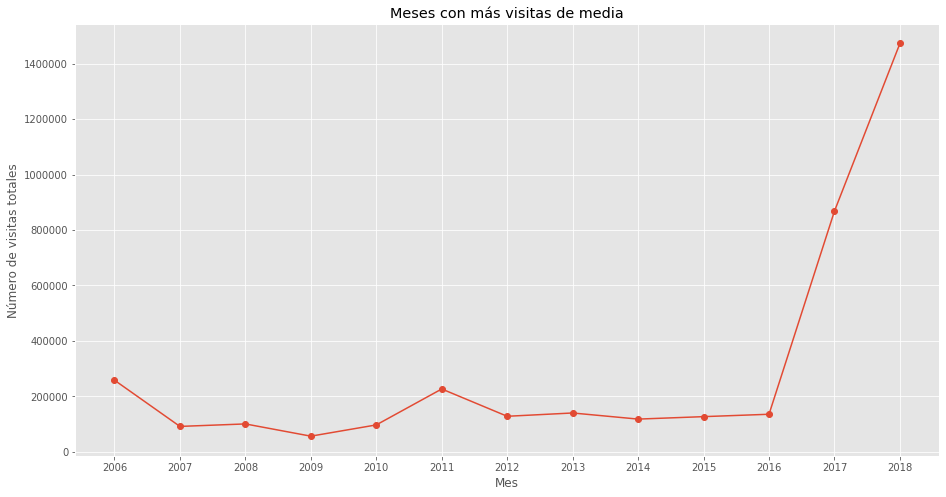

In [11]:
fig= plt.figure(figsize=(12,6))

axes= fig.add_axes([0,0,1,1])

axes.plot(resultados.media,marker='o')
axes.set(ylabel='Número de visitas totales', xlabel='Mes',
       title='Meses con más visitas de media')

plt.show()
total_dataframe['publish_time'] = total_dataframe['publish_time'].apply(lambda x: str(x)[:])
#total_dataframe.head()